# Project: Investigate a Dataset - tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The tmdb movie dataset is made up of 10866 rows and 21 columns with a mean greater than its median, making it right skewed.
The data contains both categorical and numeric features as well as date features






## Question
>Questions for analysis include:

I plan to explore the movie genres by comparing genre by different features like: Popularity and Runtime


I also want to explore the finances associated with the movie. The initial budget, revenue generated and profit thereof 

In [12]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALX x Udacity Data Analyst/Project 1/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
# check datashape to identify number of rows and columns
df.shape

(10866, 21)



> the data is made up of 10866 rows and 21 columns


In [17]:
# check column names for inconsistency
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [18]:
# check distribution of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




> the data is right skewed because the mean is less that the median (50th percentile)





In [19]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       



> the date column is not identified as date datatype



In [20]:
# check if the buget and revenue columns contain 0s
print("Rows With Zeros In The Budget Column:",df[(df['budget_adj']==0)].shape[0])
print("Rows With Zeros In The Revenue Column:",df[(df['revenue_adj']==0)].shape[0])

Rows With Zeros In The Budget Column: 5696
Rows With Zeros In The Revenue Column: 6016


In [23]:
# check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [24]:
# generate names of columns with missing values
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

In [79]:
# check number of unique years
print("Number of unique years in data: ", df['release_year'].nunique(), "\n The years are: " , df['release_year'].unique())

Number of unique years in data:  56 
 The years are:  [2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]




> Data Wrangling Process


---

I checked the datatypes of the features and uncovered that the `release_date` column is string instead of datetime.

Checked the tables names to confirm consistency and that they are correctly spelt.

I analysis the data statistics using the `.describe` method and discovered that the data is left skewed because the mean is greater than the median.

The budget and revenue columns contain 5696 and 6016 zero records respectively and need to be cleaned.

The following columns contain missing data values
`'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'`





## Data Cleaning






 

In [26]:
# replace rows with 0s in revenue and budget with nan
df['revenue_adj'] = df['revenue_adj'].replace(0, np.nan)
df['budget_adj'] = df['budget_adj'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = df['budget'].replace(0, np.nan)

df.shape

(10866, 21)

In [27]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [28]:
# convert release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [29]:
# there are missing values of 10 imdb_id, 76 casts, 33 directors and 23 genres. droping them wont affect the data
# the best approach to clean these columns is to drop them because we cant assume or populate these ones statistically

df.dropna(subset = ['genres', 'cast', 'imdb_id', 'director'], axis = 0, inplace = True)
df.shape

(10727, 21)

In [30]:
# drop columns not needed
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count'], axis = 1, inplace = True)

In [31]:
df.isnull().sum()

popularity                 0
budget                  5574
revenue                 5883
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies     956
release_date               0
vote_average               0
release_year               0
budget_adj              5574
revenue_adj             5883
dtype: int64

In [32]:
# extract month from the release date column
df['Month'] = pd.to_datetime(df['release_date']).dt.month

In [33]:
# generate profit columns
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']

In [34]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


> Data Cleaning Process

For all variants of budget and revenue columns, i replaced the zeros recorded with `nan`. This way pandas can ignore it during analysis.

The `release_date` datatype was changed from string to datetime.

I dropped some unneeded columns and generated Profit column by substracting budget from revenue. Similarly, i extracted the month column from the release date.

There are quite a number of missing values, but for this analysis use case, i left them as they are because i dont want to fill the data with any statistical method that may skew the data more than it already is.


<a id='eda'></a>
## Exploratory Data Analysis





### Research Question 1 (Most Watched movie genre)

In [35]:
print('there are ', df['original_title'].nunique(), 'unique movies in the dataset')

there are  10434 unique movies in the dataset


In [36]:
# check unique genres 
genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genres_df.genres.unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

Text(0, 0.5, 'Count')

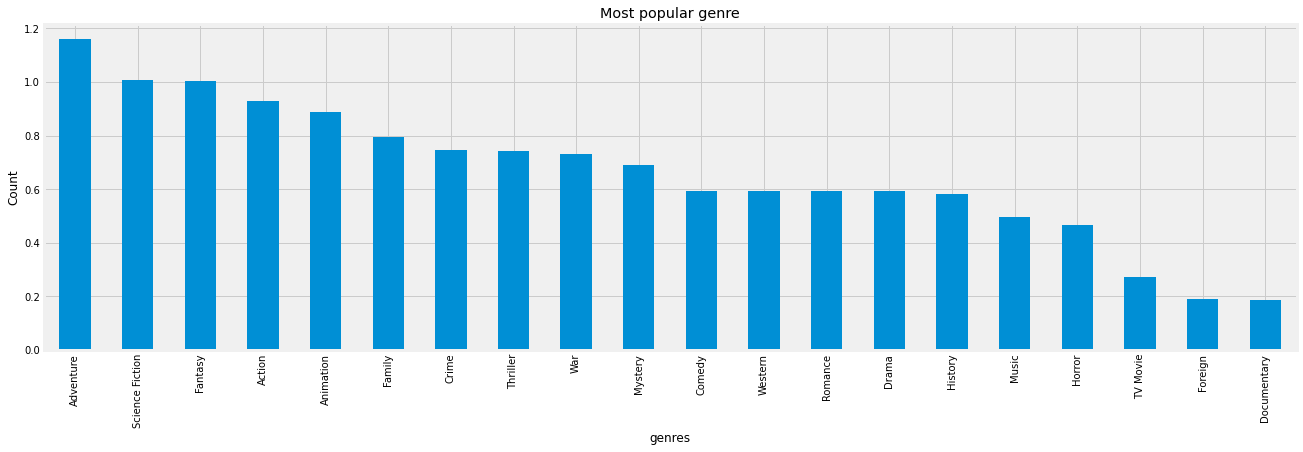

In [37]:
# plot most genre by popularity
plt.figure(figsize=(20,6))
genres_df.groupby('genres')['popularity'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Most popular genre')
plt.ylabel('Count')

From the plot above, the most popular genre is `Adventure` and the least popular is `Documentary`

Text(0, 0.5, 'Count')

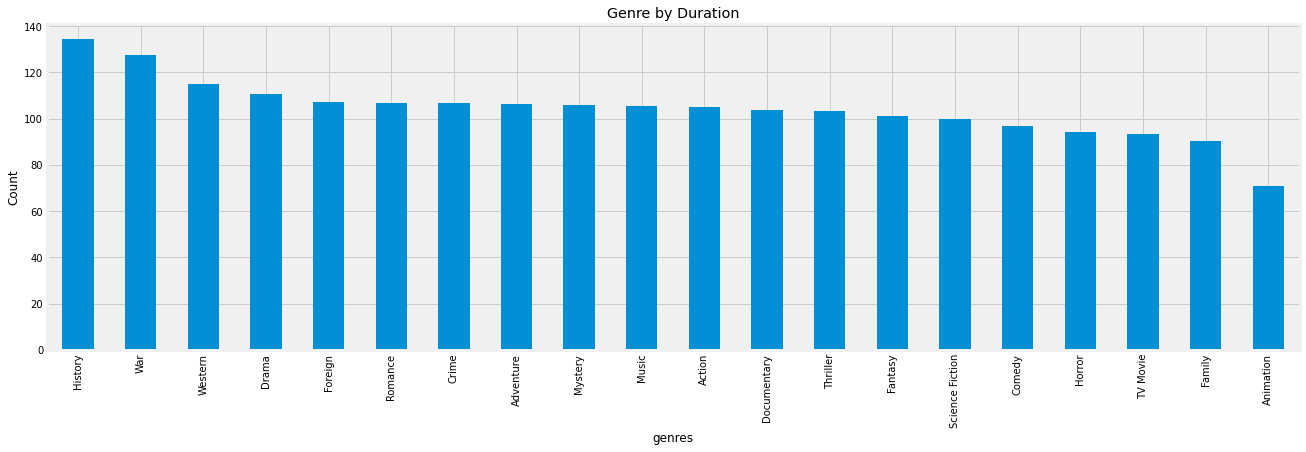

In [60]:
# plot duration of movies by genre
plt.figure(figsize=(20,6))
genres_df.groupby('genres')['runtime'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Genre by Duration')
plt.ylabel('Count')

The genre with longest duration is `history` followed closely by `war`.

`Animation` has the shortest runtime, which could be because, on average, the target audience would be children, as opposed to `history` and `war`.

Text(0.5, 1.0, 'Most watched genre')

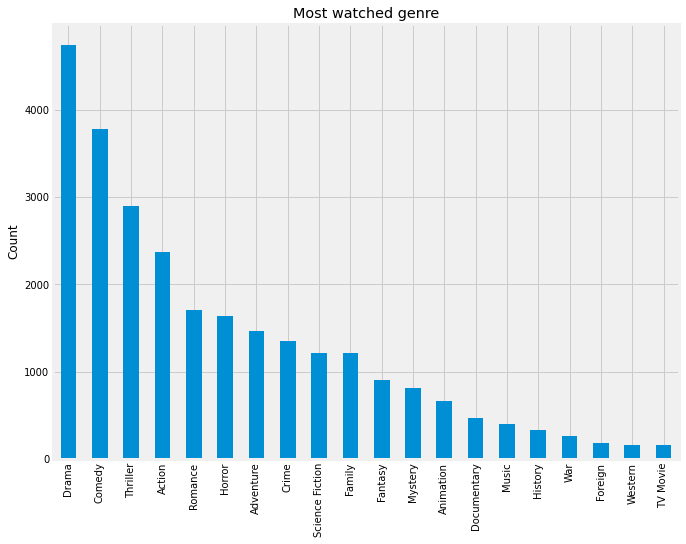

In [ ]:
# plot most watched movies
plt.rcParams['figure.figsize'] = (10, 8)
genres_df['genres'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Most watched genre')

Despite being the most popular genres, `Adventure` and `Science Fiction` are not among the top five most watched.

The top 3 most watched are `Drama`, `Comdey` and `Thriller`.

This shows that popularity is not causation for watch preference

In [75]:
# show average revenue generated by genre
genres_df.groupby('genres').revenue_adj.sum()

genres
Action             2.187527e+11
Adventure          2.084043e+11
Animation          5.959403e+10
Comedy             1.816622e+11
Crime              7.668667e+10
Documentary        1.140054e+09
Drama              1.923743e+11
Family             1.080039e+11
Fantasy            1.018905e+11
Foreign            3.243051e+08
History            1.601483e+10
Horror             3.942340e+10
Music              1.903451e+10
Mystery            4.122033e+10
Romance            8.250764e+10
Science Fiction    1.068974e+11
TV Movie           5.838910e+07
Thriller           1.607176e+11
War                1.889625e+10
Western            7.606709e+09
Name: revenue_adj, dtype: float64

In [ ]:
# show average movie popularity by genre
genres_df.groupby('genres').popularity.mean()

genres
Action             0.930226
Adventure          1.159632
Animation          0.887283
Comedy             0.594795
Crime              0.745221
Documentary        0.188172
Drama              0.592962
Family             0.794379
Fantasy            1.002500
Foreign            0.191552
History            0.582103
Horror             0.465370
Music              0.495123
Mystery            0.691137
Romance            0.593143
Science Fiction    1.009380
TV Movie           0.272252
Thriller           0.742484
War                0.732346
Western            0.594216
Name: popularity, dtype: float64

In [ ]:
def top_players(column_name):

    ''' Function to accept column name in a dataset, split the pipe character if exist and store outcome as a pandas series in descending order'''

    df['cast'] = df['cast'].astype(str)
    df['director'] = df['director'].astype(str)
    
    # From the column entered, separate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    # StorE the values separately as pandas series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count

In [ ]:
# show top 5 actors by number of movies starred
cast_count = top_players('cast')
cast_count = pd.DataFrame(data=cast_count)

print(cast_count.head(5))

                    0
Robert De Niro     72
Samuel L. Jackson  71
Bruce Willis       62
Nicolas Cage       61
Michael Caine      53


In [ ]:
# show top 5 directors by number of movies directed
director_count = top_players('director')
director_count = pd.DataFrame(data=director_count)

print(director_count.head(5))

                   0
Woody Allen       46
Clint Eastwood    34
Steven Spielberg  30
Martin Scorsese   30
Ridley Scott      23


In [ ]:
# show the top 5 production companies by number of movies produced
production_companies_count = top_players('production_companies')
production_companies_count = pd.DataFrame(data=production_companies_count)

print(production_companies_count.head(5))

                                          0
Universal Pictures                      522
Warner Bros.                            509
Paramount Pictures                      431
Twentieth Century Fox Film Corporation  282
Columbia Pictures                       272


### Research Question 2  (Revenue generated)

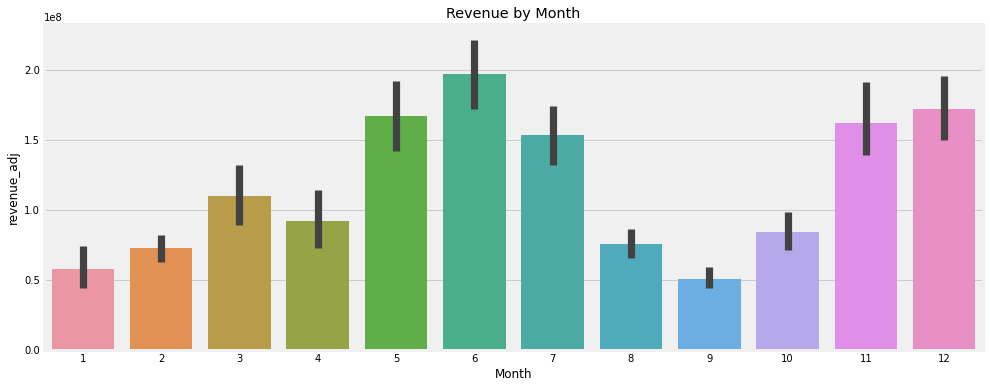

In [ ]:
# show revenue generation by month 
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x = 'Month', y = 'revenue_adj', data = df)
ax.set_title('Revenue by Month')
plt.show()

June and December generate the most revenue, while September and January generate the least.

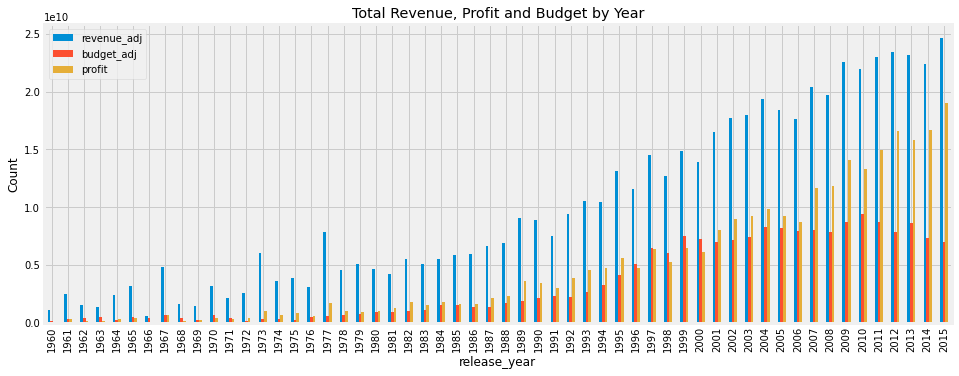

In [ ]:
# plot revenue, budget and profit for each year
plt.rcParams["figure.figsize"] = [14.50, 5.50]
finance_by_year = df.loc[:, ['revenue_adj', 'budget_adj','profit', 'release_year']].groupby('release_year').sum()
finance_by_year.plot(kind='bar')
plt.title('Total Revenue, Profit and Budget by Year')
plt.ylabel('Count')
plt.show()

For the majority of the years depicted, revenue generated exceeds the film's budget, resulting in a sizable profit. However, in 1968, 1970, 1997, 1998, 1999, and 2000, the budget exceeds the profit. We can conclude that, despite the fact that revenue was generated, the profit after deducting expenses and expenditure was not substantial.

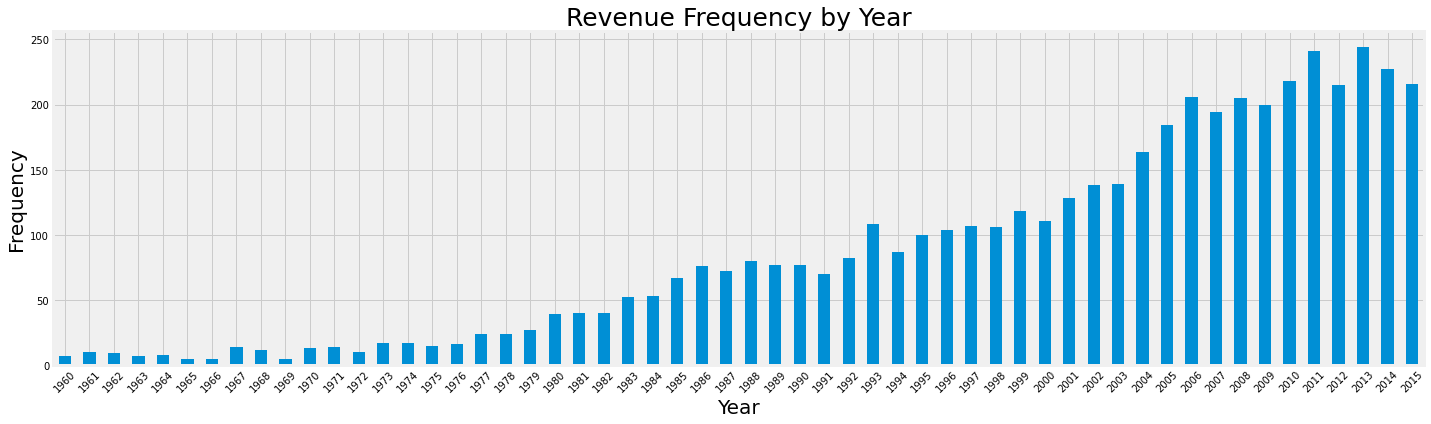

In [ ]:
# show frquency of revenue generation by year 
plt.figure(figsize=(20,6))
df.groupby('release_year')['revenue_adj'].count().plot(kind='bar')
plt.title('Revenue Frequency by Year', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The film industry appears to have generated the most revenue in 2013, but this was not maintained as there was a drop in subsequent years.

Text(0, 0.5, 'Frquency')

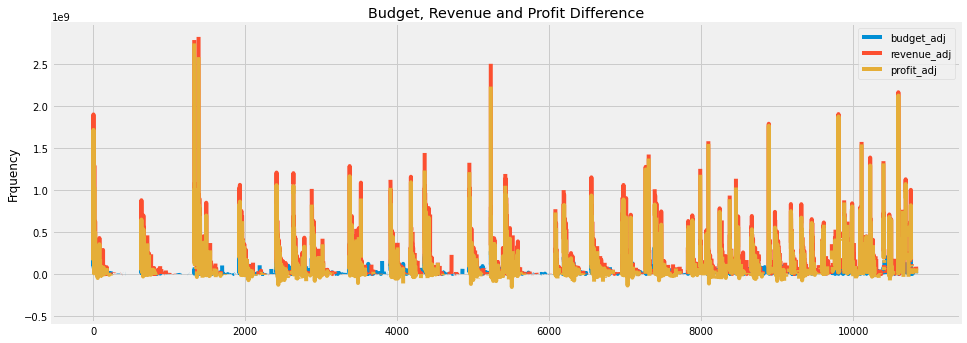

In [ ]:
# plot frequency of the financial columns
df[['budget_adj', 'revenue_adj', 'profit_adj']].plot()
plt.title('Budget, Revenue and Profit Difference')
plt.ylabel('Frquency')

The frequency of occurrence demonstrates that, on average, generated profit outnumbers budget but is slightly less than revenue.

<a id='conclusions'></a>
## Conclusions

> Drama is the most watched genre followed by comedy

The top three revenue generating genres are:
1. Action             
2. Adventure          
3. Animation           

However, the most poupular genres are:

1. Adeventure
2. Science Fiction
3. Fantasy

and genres with the longest runtime are:

1. History
2. War

---
Top 3 Production Companies for movies:

1. Universal Pictures                      
2. Warner Bros.                            
3. Paramount Pictures

the most starred actors in movies are:

1. Robert De Niro  
2. Bruce Willis 
3. Samuel L. Jackson 


and the top 5 directors are:
1. Steven Spielberg            
2. Clint Eastwood              
3. Ridley Scott                
4. Woody Allen                 
5. Steven Soderbergh           
----------------------------------------------------------

> Revenue began surpassing budget from 1980.

There is an upward spiral in revenue increase by year.

Highest Revenue is generated in May and December.

On average, profit generated is greater than both revenue and budget.

Given the fact that 2014 and 2015 were the most recent years, revenue was highest in 2013 and 2011.

<a id='conclusions'></a>




## Limitations
> Before my submission was reviewed, I had no idea I was supposed to use the adjusted variants for budget and revenue. Knowing this now has influenced my results.

It took some time to decide which features to plot together because I had to first explore different features before settling.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255

In [83]:
# convert notebook to html file
%%shell
jupyter nbconvert --to html /content/Investigating_tmdb_movie_dataset.ipynb

[NbConvertApp] Converting notebook /content/Investigating_tmdb_movie_dataset.ipynb to html
[NbConvertApp] Writing 552011 bytes to /content/Investigating_tmdb_movie_dataset.html
